# Summarizing and computing descriptive statistics
- 축소 메소드 옵션
- 기술통계와 요약통계
- Unique values, value counts, and membership
- 유일값, 값세기, 버리기 메소드

In [1]:
from IPython.display import Image

from pandas import Series, DataFrame
import pandas as pd
import numpy as np

# 3. Summarizing and computing descriptive statistics
기술통계 계산과 요약

- pandas 객체는 일반적인 수학 메소드와 통계 메소드를 가지고 있다.
- 대부분 Series나 DataFrame 하나의 칼럼이나 로우에서 단일 값(합이나 평균같은)을 구하는 축소 혹은 요약통계 범주
- 순수 NumPy 배열에서 제공하는 동일한 메소드와 비교하여 pandas의 메소드는 처음부터 누락된 데이터를 제외하도록 설계되었다.

In [25]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [5]:
df.sum(axis = 0) # 기본값 axis 

one    9.25
two   -5.80
dtype: float64

In [14]:
?df.sum # != ?\sum은 조금 다름. 구체적으로 질문을 할 수 있는듯

In [8]:
df.sum(axis = 1) # 디폴트는 0이고, 이렇게 하면 row 확인

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [7]:
# skinpa : 누락된 값을 제외할 것인 정하는 옵션
df.mean(axis=1, skipna=False) # 이러면 NaN이 들어간 연산은 전부 NaN

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

In [9]:
df.mean(axis=1, skipna=True) # 전부 다 NaN이라 연산이 불가능한 게 아니라면 연산해줌

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

# 축소 메소드 옵션
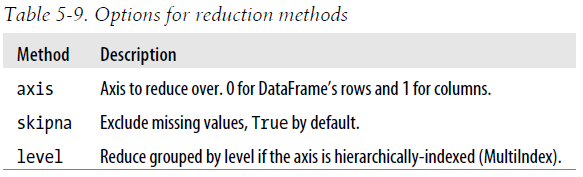

In [10]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [8]:
df.idxmax() # 맥스인 값을 가지고 있는 row를 알려준다, 디폴트가 row임 ( axis = 0으로 하면 컬럼 기준)

one    b
two    d
dtype: object

In [ ]:
df.cumsum() # 데이터 누적합

In [15]:
# 한번에 통계 결과를 여러개 만들어 내는 함수
df.describe() # 이 describe도 어떤 데이터를 넣어주느냐에 따라 나오는 형식이 다 다름.

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [16]:
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

In [17]:
['a', 'a', 'b', 'c'] * 4 # 이러면 [, 4]짜리가 4번 반복

['a',
 'a',
 'b',
 'c',
 'a',
 'a',
 'b',
 'c',
 'a',
 'a',
 'b',
 'c',
 'a',
 'a',
 'b',
 'c']

# 기술통계와 요약통계
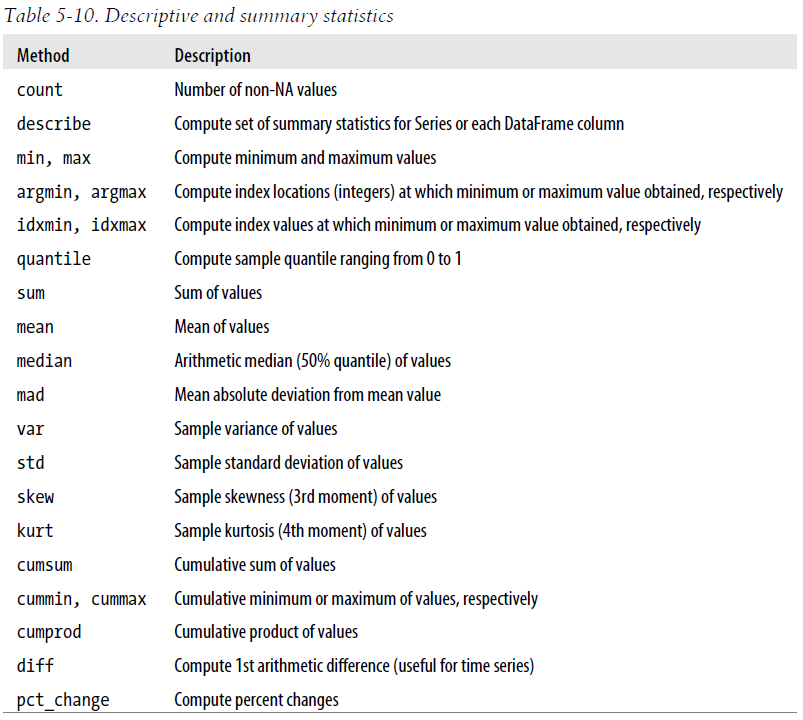

# Unique values, value counts, and membership 
    유일 값, 값 세기, 멤버십

In [9]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])

In [10]:
uniques = obj.unique()
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [30]:
obj.value_counts() # 중복된 값의 갯수를 찾아주고, 값이 큰 수대로 정렬

c    3
a    3
b    2
d    1
dtype: int64

In [28]:
obj.value_counts() == pd.value_counts(obj.values)

c    True
a    True
b    True
d    True
dtype: bool

In [17]:
pd.value_counts(obj.values, sort=False) # 정렬만 안 해줌.

d    1
a    3
b    2
c    3
dtype: int64

In [16]:
pd.value_counts(obj.values) # ==  pd.value_counts(obj.values, sort = True) # 정렬만 안 해줌.값은 큰 값대로 정렬

c    3
a    3
b    2
d    1
dtype: int64

In [27]:
mask = obj.isin(['b', 'c']) # obj 안에 b or c 가 있는지 확인
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [30]:
obj[mask] # 위 값에 True인 것들만 출력

0    c
5    b
6    b
7    c
8    c
dtype: object

In [31]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                  'Qu2': [2, 3, 1, 2, 3],
                  'Qu3': [1, 5, 2, 4, 4]})
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [ ]:
# DataFrame.apply() 
# 위 원본에 Qu1에 1은 1개, 2는 없고 3은 2개, 4는 2개니까 그대로 출력됨
result = data.apply(pd.value_counts)
result

In [32]:
# DataFrame.apply() 
# 위 원본에 Qu1에 1은 1개, 2는 없고 3은 2개, 4는 2개니까 그대로 출력됨
result = data.apply(pd.value_counts).fillna(0) # fillna는 NaN에 넣어줄 값
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


# 유일값, 값세기, 버리기 메소드
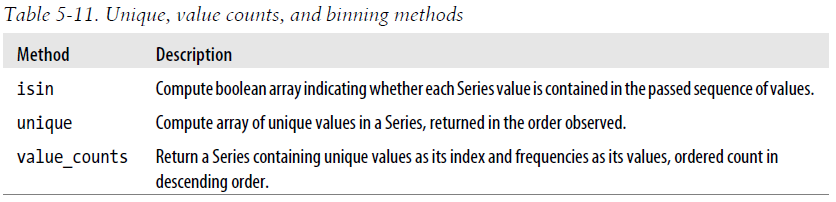